<a href="https://colab.research.google.com/github/AAAngieShao/IntroToGit/blob/main/sensed_sleep_to_stress.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip -u "/content/drive/MyDrive/Fall 2023/Precision hebavioral health/Project 1/rawData/1_HealthEx.zip" -d "/content/drive/MyDrive/Fall 2023/Precision hebavioral health/Project 1/rawData/1"
!unzip -u "/content/drive/MyDrive/Fall 2023/Precision hebavioral health/Project 1/rawData/2_HealthEx.zip" -d "/content/drive/MyDrive/Fall 2023/Precision hebavioral health/Project 1/rawData/2"
!unzip -u "/content/drive/MyDrive/Fall 2023/Precision hebavioral health/Project 1/rawData/3_HealthEx.zip" -d "/content/drive/MyDrive/Fall 2023/Precision hebavioral health/Project 1/rawData/3"
!unzip -u "/content/drive/MyDrive/Fall 2023/Precision hebavioral health/Project 1/rawData/5_HealthEx.zip" -d "/content/drive/MyDrive/Fall 2023/Precision hebavioral health/Project 1/rawData/5"
!unzip -u "/content/drive/MyDrive/Fall 2023/Precision hebavioral health/Project 1/rawData/6_HealthEx.zip" -d "/content/drive/MyDrive/Fall 2023/Precision hebavioral health/Project 1/rawData/6"
!unzip -u "/content/drive/MyDrive/Fall 2023/Precision hebavioral health/Project 1/rawData/7_HealthEx.zip" -d "/content/drive/MyDrive/Fall 2023/Precision hebavioral health/Project 1/rawData/7"
!unzip -u "/content/drive/MyDrive/Fall 2023/Precision hebavioral health/Project 1/rawData/9_HealthEx.zip" -d "/content/drive/MyDrive/Fall 2023/Precision hebavioral health/Project 1/rawData/9"
!unzip -u "/content/drive/MyDrive/Fall 2023/Precision hebavioral health/Project 1/rawData/10_HealthEx.zip" -d "/content/drive/MyDrive/Fall 2023/Precision hebavioral health/Project 1/rawData/10"
!unzip -u "/content/drive/MyDrive/Fall 2023/Precision hebavioral health/Project 1/rawData/11_HealthEx.zip" -d "/content/drive/MyDrive/Fall 2023/Precision hebavioral health/Project 1/rawData/11"
!unzip -u /content/drive/MyDrive/Fall 2023/Precision hebavioral health/Project 1/rawData/14_HealthEx.zip" -d "/content/drive/MyDrive/Fall 2023/Precision hebavioral health/Project 1/rawData/14"
!unzip -u "/content/drive/MyDrive/Fall 2023/Precision hebavioral health/Project 1/rawData/15_HealthEx.zip" -d "/content/drive/MyDrive/Fall 2023/Precision hebavioral health/Project 1/rawData/15"
!unzip -u "/content/drive/MyDrive/Fall 2023/Precision hebavioral health/Project 1/rawData/16_HealthEx.zip" -d "/content/drive/MyDrive/Fall 2023/Precision hebavioral health/Project 1/rawData/16"
!unzip -u "/content/drive/MyDrive/Fall 2023/Precision hebavioral health/Project 1/rawData/18_HealthEx.zip" -d "/content/drive/MyDrive/Fall 2023/Precision hebavioral health/Project 1/rawData/18"

Archive:  /content/drive/MyDrive/Fall 2023/Precision hebavioral health/Project 1/rawData/1_HealthEx.zip
Archive:  /content/drive/MyDrive/Fall 2023/Precision hebavioral health/Project 1/rawData/2_HealthEx.zip
Archive:  /content/drive/MyDrive/Fall 2023/Precision hebavioral health/Project 1/rawData/3_HealthEx.zip
Archive:  /content/drive/MyDrive/Fall 2023/Precision hebavioral health/Project 1/rawData/5_HealthEx.zip
Archive:  /content/drive/MyDrive/Fall 2023/Precision hebavioral health/Project 1/rawData/6_HealthEx.zip
Archive:  /content/drive/MyDrive/Fall 2023/Precision hebavioral health/Project 1/rawData/7_HealthEx.zip
Archive:  /content/drive/MyDrive/Fall 2023/Precision hebavioral health/Project 1/rawData/9_HealthEx.zip
Archive:  /content/drive/MyDrive/Fall 2023/Precision hebavioral health/Project 1/rawData/10_HealthEx.zip
Archive:  /content/drive/MyDrive/Fall 2023/Precision hebavioral health/Project 1/rawData/11_HealthEx.zip
/bin/bash: -c: line 1: unexpected EOF while looking for matchi

In [ ]:
%ls "/content/drive/My Drive/Precision Behavioral Health/Project 1/rawData/1/HealthEx"

ls: cannot access '/content/drive/My Drive/Precision Behavioral Health/Project 1/rawData/1/HealthEx': No such file or directory


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Getting Sensor Data

In [ ]:
def adjustDates(r):
  # if you went to sleep after 5pm, the "date" of that sleep is pushed to the following day
  if r.sleepTime.time().hour > 17:
    r.DateWake = r.DateWake + datetime.timedelta(days=1)
  return r

In [ ]:
def getSleepSensorData(pid):
  # get the csv into dataframe
  pid = str(pid)
  filepath = "/content/drive/MyDrive/Fall 2023/Precision hebavioral health/Project 1/rawData/" + str(pid) + "/HealthEx"
  raw_sleep = pd.DataFrame(pd.read_csv(filepath+"/SleepAnalysis.csv")).reset_index().rename(columns={"index": "startDate", "startDate": "endDate", "endDate": "category", "category": "Hi"})  # get sleep start and end times
  clean_sleep = raw_sleep[["startDate", "endDate"]]
  # convert units
  clean_sleep.insert(0, "wakeTime", pd.to_datetime(clean_sleep["endDate"], unit="s"))
  clean_sleep.insert(1, "sleepTime", pd.to_datetime(clean_sleep["startDate"], unit="s"))
  clean_sleep = clean_sleep[["sleepTime", "wakeTime"]]
  # get the date
  clean_sleep['DateSleep'] = pd.to_datetime(clean_sleep['sleepTime']).dt.date
  clean_sleep['DateWake'] = pd.to_datetime(clean_sleep['wakeTime']).dt.date
  # sleep duration
  clean_sleep['duration'] = clean_sleep['wakeTime'] - clean_sleep['sleepTime']
  # adjust date if you went to sleep after 5pm that day
  clean_sleep.apply(adjustDates, axis=1)
  # group by date to sum all sensor readings for one day
  date_grouped = clean_sleep.groupby("DateWake").sum()
  date_grouped.insert(0, "Participant", pid)
  # convert from datetime to hours
  date_grouped['hours'] = date_grouped['duration']
  date_grouped['durationHours'] = date_grouped['duration'].astype('timedelta64[m]') / 60
  # drop unneeded columns
  date_grouped = date_grouped.drop(['duration', 'hours'], axis=1)
  date_grouped = date_grouped.reset_index()
  return date_grouped

In [ ]:
p1 = getSleepSensorData(1)
# p2 = getSleepData(2) # no data
p3 = getSleepSensorData(3)
# p4 = getSleepData(4) # no data
# p5 = getSleepData(5) # no data
# p6 = getSleepData(6) # no data
p7 = getSleepSensorData(7)
# p8 = getSleepData(8) # no data
p9 = getSleepSensorData(9)
p10 = getSleepSensorData(10)
p11 = getSleepSensorData(11)
# p12 = getSleepData(12) # no data
# p13 = getSleepData(13) # no data
# p14 = getSleepData(14) # no data
p15 = getSleepSensorData(15)
p16 = getSleepSensorData(16)
# p17 = getSleepData(17) # no data
p18 = getSleepSensorData(18)

sleep_dfs = [p1, p3, p7, p9, p10, p11, p15, p16, p18]
sensor_sleep = pd.concat(sleep_dfs)

<ipython-input-5-f568c64fdda7>:19: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  date_grouped = clean_sleep.groupby("DateWake").sum()
<ipython-input-5-f568c64fdda7>:19: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  date_grouped = clean_sleep.groupby("DateWake").sum()
<ipython-input-5-f568c64fdda7>:19: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  date_grouped = clean_sleep.groupby("DateWake").sum()
<ipython-input-5-f568c

In [ ]:
sensor_sleep

,DateWake,Participant,durationHours
0,2023-08-25,1,2.900000
1,2023-08-26,1,2.500000
2,2023-08-27,1,0.583333
3,2023-08-28,1,1.483333
4,2023-08-29,1,3.266667
...,...,...,...
21,2023-09-14,18,8.100000
22,2023-09-15,18,9.000000
23,2023-09-16,18,8.783333
24,2023-09-17,18,8.966667


# Getting Self Reported Data

In [ ]:
def getSleepReportedData():
  filepath = "/content/drive/MyDrive/Fall 2023/Precision hebavioral health/Project 1/rawData/self_reported/self_reported.csv"
  raw_reported = pd.DataFrame(pd.read_csv(filepath))
  raw_sleep = raw_reported[['Timestamp', 'What is your participant ID?', 'Approximately how many hours of sleep did you get last night?']]
  raw_sleep = raw_sleep.rename(columns={'What is your participant ID?': "Participant", 'Approximately how many hours of sleep did you get last night?': "Duration"})
  raw_sleep["Timestamp"] = pd.to_datetime(raw_sleep["Timestamp"]).dt.date
  return raw_sleep

In [ ]:
reported_sleep = getSleepReportedData()

In [ ]:
reported_sleep

,Timestamp,Participant,Duration
0,2023-08-27,11,8.00
1,2023-08-28,18,6.00
2,2023-08-29,18,8.50
3,2023-08-30,18,7.00
4,2023-08-30,10,7.00
5,2023-08-31,16,5.00
6,2023-09-01,18,8.50
7,2023-09-01,14,6.50
8,2023-09-02,15,9.00
9,2023-09-03,16,7.00


# Getting stress data

In [ ]:
def getStressReportedData():
  filepath = "/content/drive/MyDrive/Fall 2023/Precision hebavioral health/Project 1/rawData/self_reported/self_reported.csv"
  raw_reported = pd.DataFrame(pd.read_csv(filepath))
  raw_sleep = raw_reported[['Timestamp', 'What is your participant ID?', 'From the time you woke up this morning, until the present, how stressed did you feel today?']]
  raw_sleep = raw_sleep.rename(columns={'What is your participant ID?': "Participant", 'From the time you woke up this morning, until the present, how stressed did you feel today?': "Stress"})
  raw_sleep["Timestamp"] = pd.to_datetime(raw_sleep["Timestamp"]).dt.date
  return raw_sleep

In [ ]:
reported_stress = getStressReportedData()

In [ ]:
reported_stress.head()

,Timestamp,Participant,Stress
0,2023-08-27,11,2
1,2023-08-28,18,3
2,2023-08-29,18,2
3,2023-08-30,18,2
4,2023-08-30,10,2


# Sensor sleep - stress

In [ ]:
sensor_merged_stress = pd.merge(sensor_sleep, reported_stress, left_on=["Participant", "DateWake"], right_on=["Participant", "Timestamp"])

In [ ]:
sensor_merged_stress.head()

,DateWake,Participant,durationHours,Timestamp,Stress
0,2023-09-06,7,4.250000,2023-09-06,4
1,2023-09-07,7,7.000000,2023-09-07,3
2,2023-09-12,7,6.950000,2023-09-12,3
3,2023-08-30,10,14.950000,2023-08-30,2
4,2023-09-06,10,15.983333,2023-09-06,2


In [ ]:
sleep_hours = sensor_merged_stress['durationHours']
stress_levels = sensor_merged_stress['Stress']
corr = sleep_hours.corr(stress_levels)
corr

-0.4345669149197741

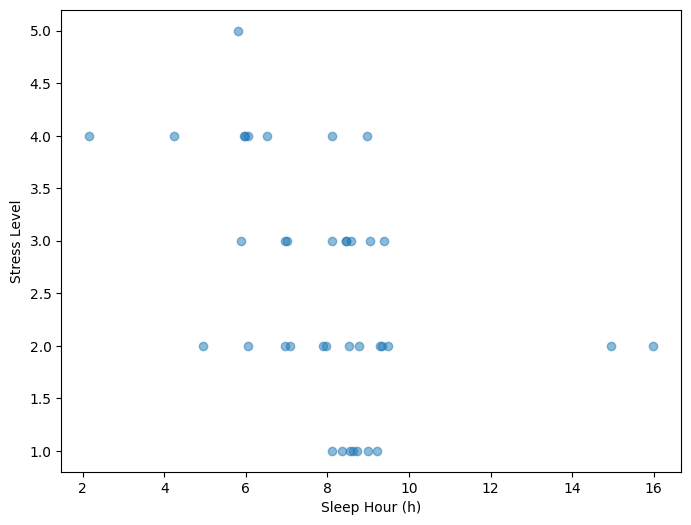

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(sleep_hours, stress_levels, alpha=0.5)

plt.xlabel('Sleep Hour (h)')
plt.ylabel('Stress Level')

# Show the plot
plt.show()

In [ ]:
avg_sleep_hour = []
for i in range(1, 6):
  avg_sleep_hour.append(sleep_hours.loc[stress_levels == i].mean())
avg_sleep_hour

[8.652380952380954,
 9.021794871794873,
 7.983333333333334,
 6.002083333333333,
 5.8]

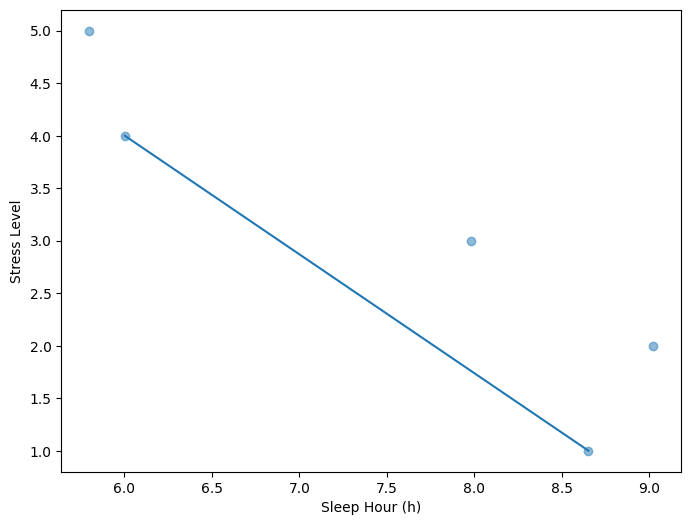

In [ ]:
plt.figure(figsize=(8, 6))
stress_level_values = [i for i in range(1, 6)]
plt.scatter(avg_sleep_hour, stress_level_values, alpha=0.5)
plt.plot([avg_sleep_hour[0], avg_sleep_hour[3]],[ stress_level_values[0], stress_level_values[3]])

plt.xlabel('Sleep Hour (h)')
plt.ylabel('Stress Level')

# Show the plot
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(sleep_hours, stress_levels, test_size=0.1, random_state=42)

dataset = {
    "X_train": X_train,
    "X_test": X_test,
    "y_train": y_train,
    "y_test": y_test
}

for key in dataset.keys():
  dataset[key] = dataset[key].values.reshape(-1, 1)

In [ ]:
lr = LogisticRegression(multi_class='ovr').fit(dataset["X_train"], dataset["y_train"])

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
y_predict = lr.predict(dataset["X_train"])
accuracy_score(y_predict, y_train)

0.4411764705882353

In [ ]:
y_predict = lr.predict(dataset["X_test"])
accuracy_score(y_predict, y_test)

0.5

# self reported - stress